<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [9]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [10]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [11]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [12]:
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


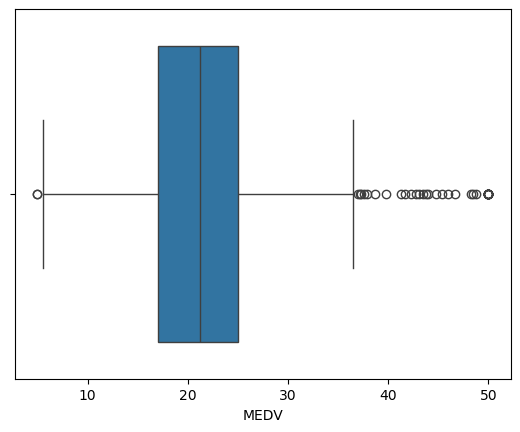

<class 'NameError'>: name 'x' is not defined

In [22]:
ax = sns.boxplot(x='MEDV', data=boston_df)
x.title("Mediam value of owener-occupied homes")
x.xlabel("MEDV")
plot.show()

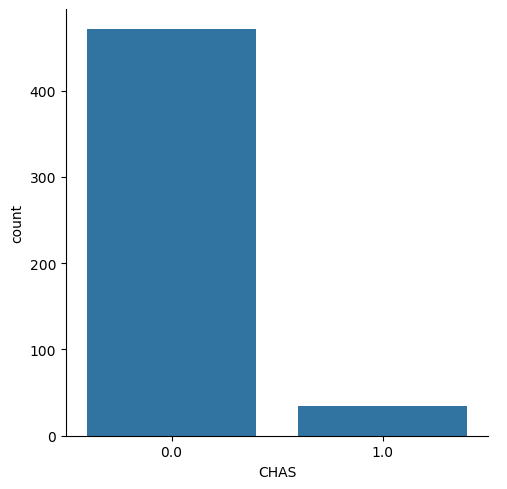

<class 'NameError'>: name 'x' is not defined

In [23]:
ax = sns.catplot(x='CHAS',kind='count', data=boston_df)
x.title('Charles river variable')
x.xlabel('CHAS')
x.ylabel('count')
plot.show()

In [24]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

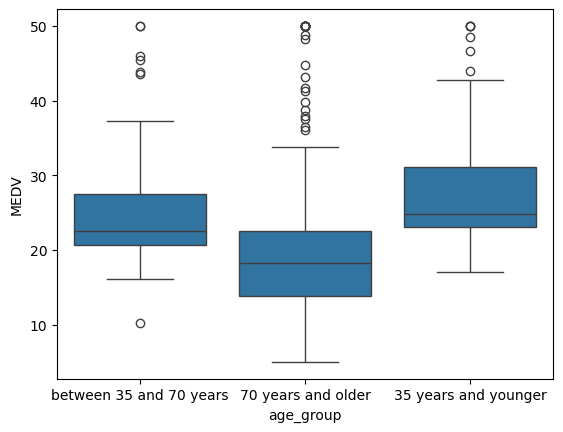

<class 'NameError'>: name 'x' is not defined

In [27]:
ax = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
x.title('MEDV based on age group')
x.xlabel('Age groups')
x.ylabel('MEDV')
plot.show()

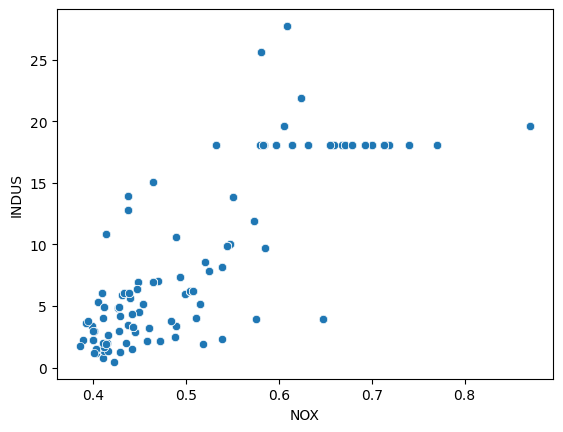

<class 'NameError'>: name 'x' is not defined

In [35]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
x.title('Relationship between NOX and INDUS')
x.xlabel('NOX')
x.ylabel('INDUS')
plot.show()

A positive relationship exists between Nitric Oxides and the porportion of residential non-retail businness arces per town.

In [29]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

[Text(0.5, 0, 'Pupil to Teacher Ratio'), Text(0.5, 1.0, 'Pupil distribution')]

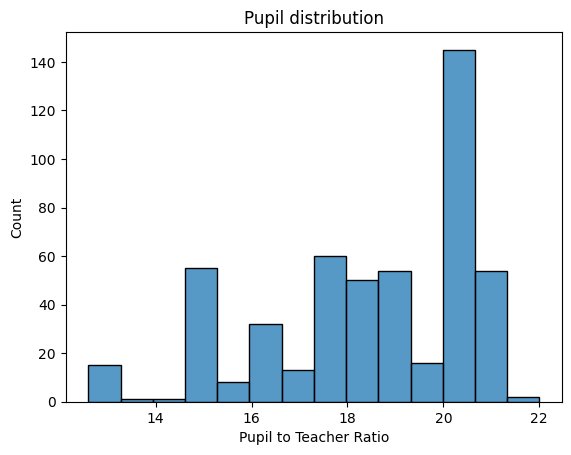

In [34]:
ax = sns.histplot(data=boston_df, x="PTRATIO")
ax.set(xlabel="Pupil to Teacher Ratio", title="Pupil distribution")

# T-TEST

### Hypothesis

In [ ]:
State the Hypothesis:

*   $H\_0: µ1 = µ2$("there is no difference in median value of houses bounded by the Charles river or not")
*   $H\_1: µ1 ≠ µ2$("there is a difference in median value of houses bounded by the Charles river or not")

In [37]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [38]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [39]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'], boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Conclusion: We reject the null hypthesis. There is not enough proof that there is a differnce between teaching evaluations based on the evidence on the Charles River

# ANOVA

State the Hypothesis:

*   $H\_0: µ1 = µ2$("there is no difference in median value of houses for each porportion of owener occupied units built prior to 1940")
*   $H\_1: µ1 ≠ µ2$("there is a difference in median value of houses for each porportion of owener occupied units built prior to 1940")

In [40]:
less_35 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
between_35_70 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
greater_70 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [41]:
scipy.stats.levene(less_35, between_35_70, greater_70, center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [42]:
scipy.stats.f_oneway(less_35, between_35_70, greater_70)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Conclusion: We reject the null hypothesis there is significant evidence that as least one of the means differ

# Person Correlation

State the Hypothesis:

*   $H\_0: µ1 = µ2$("there is no relationship between Nitric Oxide concentrations and proportions of non-retail buisness acres per town")
*   $H\_1: µ1 ≠ µ2$("there is a relationship between Nitric Oxide concentrations and proportions of non-retail buisness acres per town")

In [43]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Conclusion: We reject the Null Hypothesis there is no relationship between Nitric Oxide concentration and the proportion of non-retail buisness arces per town

# Regression Analysis

State the Hypothesis:

*   $H\_0: µ1 = µ2$("Weighted distance to the five Boston employment centres has no impact on the median value of owner occupied homes")
*   $H\_1: µ1 ≠ µ2$("Weighted distance to the five Boston employment centres has an impact on the median value of owner occupied homes")

In [44]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 08 Jan 2024   Prob (F-statistic):           1.21e-08
Time:                        11:16:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Conclusion: There is no correlation between the weighted distances to the five Boston centres and 